In [1]:
# external imports
import copy
import multiprocessing

# local imports
from classes.cbnetwork import CBN
from classes.globaltopology import GlobalTopology
from classes.localtemplates import LocalNetworkTemplate

num_cpus = multiprocessing.cpu_count()

# pass the parameters
N_LOCAL_NETWORKS = 20
N_VARS_NETWORK = 20
N_OUTPUT_VARS = 2
N_INPUT_VARS = 2
V_TOPOLOGY = 2
N_MAX_CLAUSES = 2
N_MAX_LITERALS = 2

# GENERATE THE LOCAL NETWORK TEMPLATE
o_template = LocalNetworkTemplate(n_vars_network=N_VARS_NETWORK, n_input_variables=N_INPUT_VARS,
                                  n_output_variables=N_OUTPUT_VARS, n_max_of_clauses=N_MAX_CLAUSES,
                                  n_max_of_literals=N_MAX_LITERALS, v_topology=V_TOPOLOGY)

# GENERATE THE GLOBAL TOPOLOGY
o_global_topology = GlobalTopology.generate_sample_topology(v_topology=V_TOPOLOGY,
                                                            n_nodes=N_LOCAL_NETWORKS)

# generate aleatory CBN by topology
o_cbn = CBN.generate_cbn_from_template(v_topology=V_TOPOLOGY,
                                       n_local_networks=N_LOCAL_NETWORKS,
                                       n_vars_network=N_VARS_NETWORK,
                                       o_template=o_template,
                                       l_global_edges=o_global_topology.l_edges)

# Crear copias profundas del objeto original
o_cbn1 = copy.deepcopy(o_cbn) # Serial
o_cbn2 = copy.deepcopy(o_cbn) # Parallel Simple
o_cbn3 = copy.deepcopy(o_cbn) # Parallel with weights

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
-------------------------------

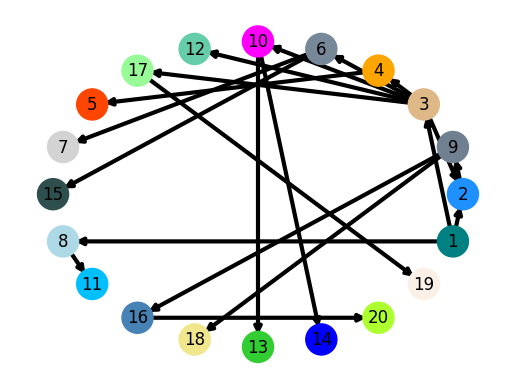

In [2]:
o_cbn1.plot_topology()

In [3]:
o_cbn1.find_local_attractors_sequential()

**************************************************
FIND LOCAL ATTRACTORS
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 1
--------------------------------------------------
Network: 1  Local Scene: None
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 2
--------------------------------------------------
Network: 2  Local Scene: 00
end find attractors
--------------------------------------------------
Network: 2  Local Scene: 01
end find attractors
--------------------------------------------------
Network: 2  Local Scene: 10
end find attractors
--------------------------------------------------
Network: 2  Local Scene: 11
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 3
--------------------------------------------------
Network: 3  Local Scene: 0
end find attractors
--------------------------------------------------
Network: 3  Local Scene: 1
end find

In [4]:
o_cbn2.find_local_attractors_parallel(num_cpus=num_cpus)

**************************************************
FIND LOCAL ATTRACTORS PARALLEL
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
FIND ATTRACTORS FOR NETWORK:--------------------------------------------------
FIND ATTRACTORS FOR NETWORK:--------------------------------------------------FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:
 FIND ATTRACTORS FOR NETWORK:
   FIND ATTRACTORS FOR NETWORK: FIND ATTRACTORS FOR NETWORK:4
136


 
2FIND ATTRACTORS FOR NETWORK: ------------------------------------------------------------------------------------------------------------------------------------------------------ 
7--------------------------------------------------

5

Network:--------------------------------------------------8Net

In [5]:
o_cbn3.find_local_attractors_parallel_with_weigths(num_cpus=num_cpus)

**************************************************
FIND LOCAL ATTRACTORS WEIGHTED BALANCED

Número de workers: 8
Distribución de tareas por bucket antes de la ejecución:
  Bucket 0: 2 tasks, total weight: 43
  Bucket 1: 3 tasks, total weight: 63
  Bucket 2: 3 tasks, total weight: 63
  Bucket 3: 3 tasks, total weight: 63
  Bucket 4: 3 tasks, total weight: 62
  Bucket 5: 2 tasks, total weight: 42
  Bucket 6: 2 tasks, total weight: 42
  Bucket 7: 2 tasks, total weight: 42
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK:

FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:
 
FIND ATTRACTORS FOR NETWORK: FIND

In [6]:
o_cbn1.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 8
Network: 1 - Scene: []
Attractors number: 8
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1']
['1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1']
--------------------------------------------------
Global index: 2 -> (1, 1, 2)
['1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1']
['1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1']
--------------------------------------------------
Global index: 3 -> (1, 1, 3)
['1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1']
['0', '1', '1', '1', '0', '0', '

In [7]:
o_cbn2.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 8
Network: 1 - Scene: []
Attractors number: 8
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1']
['1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1']
--------------------------------------------------
Global index: 2 -> (1, 1, 2)
['1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1']
['1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1']
--------------------------------------------------
Global index: 3 -> (1, 1, 3)
['1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1']
['0', '1', '1', '1', '0', '0', '

In [8]:
o_cbn3.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 8
Network: 1 - Scene: []
Attractors number: 8
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1']
['1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1']
--------------------------------------------------
Global index: 2 -> (1, 1, 2)
['1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1']
['1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1']
--------------------------------------------------
Global index: 3 -> (1, 1, 3)
['1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1']
['0', '1', '1', '1', '0', '0', '

In [9]:
len(o_cbn3.l_local_networks)

20

In [10]:
o_cbn1.find_compatible_pairs()

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
END FIND ATTRACTOR PAIRS


In [11]:


o_cbn2.find_compatible_pairs_parallel(num_cpus=num_cpus)

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS (PARALLEL)
Tareas creadas: 20
Resultados obtenidos: 20
--------------------------------------------------
END FIND COMPATIBLE ATTRACTOR PAIRS (Total pairs: 2400)


In [12]:
o_cbn3.find_compatible_pairs_parallel_with_weights(num_cpus=num_cpus)

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS (PARALLEL WITH WEIGHTS)

Número de CPUs: 8
Distribución de tareas por bucket antes de la ejecución:
  Bucket 0: 1 tasks, total weight: 30
  Bucket 1: 3 tasks, total weight: 42
  Bucket 2: 3 tasks, total weight: 42
  Bucket 3: 3 tasks, total weight: 36
  Bucket 4: 3 tasks, total weight: 36
  Bucket 5: 3 tasks, total weight: 36
  Bucket 6: 2 tasks, total weight: 28
  Bucket 7: 2 tasks, total weight: 28

Número de tareas procesadas: 20
Total de pares de atractores: 2400

Información final de los buckets:
  Bucket 0: 1 tasks, total weight: 30
  Bucket 1: 3 tasks, total weight: 42
  Bucket 2: 3 tasks, total weight: 42
  Bucket 3: 3 tasks, total weight: 36
  Bucket 4: 3 tasks, total weight: 36
  Bucket 5: 3 tasks, total weight: 36
  Bucket 6: 2 tasks, total weight: 28
  Bucket 7: 2 tasks, total weight: 28
--------------------------------------------------
END FIND COMPATIBLE ATTRACTOR PAIRS (PARALLEL WITH WEIG

In [13]:
o_cbn1.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 9
--------------------------------------------------
Coupling Variable: 401, Scene: 0
--------------------------------------------------
Coupling Variable: 401, Scene: 1
(9, 145)
(9, 146)
(9, 147)
(9, 148)
(9, 149)
(9, 150)
(9, 151)
(9, 152)
(11, 145)
(11, 146)
(11, 147)
(11, 148)
(11, 149)
(11, 150)
(11, 151)
(11, 152)
(12, 145)
(12, 146)
(12, 147)
(12, 148)
(12, 149)
(12, 150)
(12, 151)
(12, 152)
(14, 145)
(14, 146)
(14, 147)
(14, 148)
(14, 149)
(14, 150)
(14, 151)
(14, 152)
(15, 145)
(15, 146)
(15, 147)
(15, 148)
(15, 149)
(15, 150)
(15, 151)
(15, 152)
(16, 145)
(16, 146)
(16, 147)
(16, 148)
(16, 149)
(16, 150)
(16, 151)
(16, 152)
(17, 145)
(17, 146)
(17, 147)
(17, 148)
(17, 149)
(17, 150)
(17, 151)
(17, 152)
(18, 145)
(18, 146)
(18, 147)
(18, 148)
(18, 149)
(18, 150)
(18, 151)
(18, 152)
(19, 145)
(19, 146)
(19, 147)
(19, 148)
(19, 149)
(19, 150)
(19, 151)
(19, 152)
(20, 145)
(20, 14

In [14]:
o_cbn2.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 9
--------------------------------------------------
Coupling Variable: 401, Scene: 0
--------------------------------------------------
Coupling Variable: 401, Scene: 1
(9, 145)
(9, 146)
(9, 147)
(9, 148)
(9, 149)
(9, 150)
(9, 151)
(9, 152)
(11, 145)
(11, 146)
(11, 147)
(11, 148)
(11, 149)
(11, 150)
(11, 151)
(11, 152)
(12, 145)
(12, 146)
(12, 147)
(12, 148)
(12, 149)
(12, 150)
(12, 151)
(12, 152)
(14, 145)
(14, 146)
(14, 147)
(14, 148)
(14, 149)
(14, 150)
(14, 151)
(14, 152)
(15, 145)
(15, 146)
(15, 147)
(15, 148)
(15, 149)
(15, 150)
(15, 151)
(15, 152)
(16, 145)
(16, 146)
(16, 147)
(16, 148)
(16, 149)
(16, 150)
(16, 151)
(16, 152)
(17, 145)
(17, 146)
(17, 147)
(17, 148)
(17, 149)
(17, 150)
(17, 151)
(17, 152)
(18, 145)
(18, 146)
(18, 147)
(18, 148)
(18, 149)
(18, 150)
(18, 151)
(18, 152)
(19, 145)
(19, 146)
(19, 147)
(19, 148)
(19, 149)
(19, 150)
(19, 151)
(19, 152)
(20, 145)
(20, 14

In [15]:
o_cbn3.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 9
--------------------------------------------------
Coupling Variable: 401, Scene: 0
--------------------------------------------------
Coupling Variable: 401, Scene: 1
(9, 145)
(9, 146)
(9, 147)
(9, 148)
(9, 149)
(9, 150)
(9, 151)
(9, 152)
(11, 145)
(11, 146)
(11, 147)
(11, 148)
(11, 149)
(11, 150)
(11, 151)
(11, 152)
(12, 145)
(12, 146)
(12, 147)
(12, 148)
(12, 149)
(12, 150)
(12, 151)
(12, 152)
(14, 145)
(14, 146)
(14, 147)
(14, 148)
(14, 149)
(14, 150)
(14, 151)
(14, 152)
(15, 145)
(15, 146)
(15, 147)
(15, 148)
(15, 149)
(15, 150)
(15, 151)
(15, 152)
(16, 145)
(16, 146)
(16, 147)
(16, 148)
(16, 149)
(16, 150)
(16, 151)
(16, 152)
(17, 145)
(17, 146)
(17, 147)
(17, 148)
(17, 149)
(17, 150)
(17, 151)
(17, 152)
(18, 145)
(18, 146)
(18, 147)
(18, 148)
(18, 149)
(18, 150)
(18, 151)
(18, 152)
(19, 145)
(19, 146)
(19, 147)
(19, 148)
(19, 149)
(19, 150)
(19, 151)
(19, 152)
(20, 145)
(20, 14

In [16]:
# o_cbn1.mount_stable_attractor_fields()

In [17]:
# o_cbn1.show_attractors_fields()